<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

# Introdução

Para essa tarefa optei por utilizar o texto de minha autoria desenvolvido na disciplina Cientista de Dados nas Organizações do curso de especialização em Ciência de Dados (Big Data Processing and Analytics), a ideia de usar esse texto foi exatamente para ter uma noção de como ficaria a interpretação de um arquivo de 14 páginas em um contexto mais otimizado, buscando assim validar a lei de Zipf (George Kingsley Zipf: Zipf's law states that given a large sample of words used, the frequency of any word is inversely proportional to its rank in the frequency table. So word number n has a frequency proportional to 1/n. ).

# Aquisição dos Dados


In [4]:
import urllib.request  

texto = []

for line in urllib.request.urlopen('https://raw.githubusercontent.com/joaonart/mcz-pl-a1-modelo-ja/master/database/texto-mcz.txt'): 
    texto.append(line.decode('utf-8'))

for i in range(len(texto)):
    texto[i] = texto[i].lower() # para unicidade
    texto[i] = texto[i].replace('\n','')
    texto[i] = texto[i].replace('.','')
    texto[i] = texto[i].replace(',','')
    texto[i] = texto[i].replace('(','')
    texto[i] = texto[i].replace(')','')
    texto[i] = texto[i].replace('?','')
    texto[i] = texto[i].replace('\'','') # elimina ' e "


# Construção do Dicionário

In [5]:
mydict = {}                             # crie um dicionário vazio

for line in texto:

  line = line.lower()                   # converte para lower
  words = line.split()                  # separa cada palavra
#  print(words)

  for word in words:                      # para cada palavra em words
    if word not in mydict.keys():         # se palavra não está no dicionário 
      mydict[word] = 1                    # acrescenta a word com o valor 1
    else:                                 # se a entrada já existe 
      mydict[word] =  mydict[word] + 1    # apenas soma 1 ao valor já existente

print(mydict)  

{'universidade': 2, 'presbiteriana': 2, 'mackenzie': 2, 'cientista': 31, 'de': 170, 'dados': 70, 'nas': 7, 'organizações': 3, 'análise': 20, 'dos': 20, 'diferentes': 4, 'papéis': 2, 'do': 22, 'joão': 3, 'alves': 3, 'oliveira': 3, 'neto': 3, 'profa': 1, 'sueli': 2, 'santos': 2, 'leitão': 2, 'turma': 1, '01c': 1, 'barueri': 2, '2022': 13, 'trabalho': 5, 'apresentado': 2, 'pelo': 6, 'acadêmico': 2, 'como': 12, 'exigência': 1, 'curso': 1, 'especialização': 3, 'em': 56, 'ciência': 5, 'big': 1, 'data': 2, 'processing': 1, 'and': 2, 'analytics': 1, 'da': 18, 'disciplina': 1, 'sob': 2, 'a': 59, 'orientação': 1, 'professora': 1, 'sumário': 1, 'introdução': 2, '04': 1, '1': 2, 'vagas': 9, 'selecionadas': 2, '05': 2, '11': 3, 'sr': 22, 'fintech': 10, '12': 2, 'consultoria': 9, '06': 1, '13': 3, 'varejo': 8, 'online': 12, '07': 1, '2': 2, '09': 2, '21': 2, 'posicionamento': 3, 'na': 18, 'estrutura': 6, 'organizacional': 4, '22': 2, 'requisitos': 12, 'e': 82, 'competências': 4, '10': 1, '23': 2, 'p

# Exibição dos Resultados

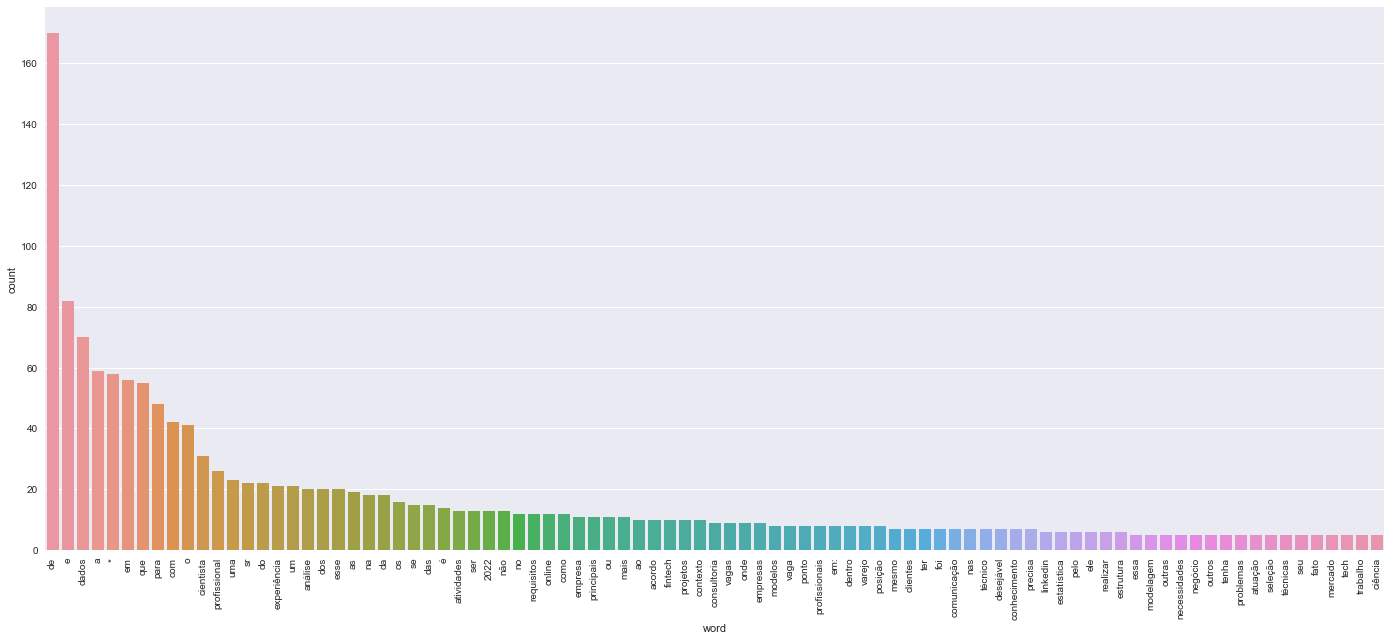

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame(mydict.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
df = df[df['count'] > 4] # somente termos com mais de 4 ocorrências
#df = df.iloc[ int(len(df)/2) - 10 : int(len(df)/2) + 10 ] # para livros ou textos com muitos termos limita a um número mínimo de termos

plt.figure(figsize=(24,10))
mpl.style.use(['seaborn'])
sns.barplot(x=df.word,y=df['count'])
plt.xticks(rotation=90) 

plt.show()

# Conclusão

Após realizar o processamento do modelo, foi possível observar que o resultado obtido se enquadra na proposta da lei de Zipf, onde podemos observar que as os artigos e preposições se destacam mais do que as outras palavras, analisando um conjunto das palavras que se repetem com maior frequência, podemos deduzir que o texto se refere a análise, profissional, cientista, dados, linkedin. Sendo esse um resumo do contexto do texto, que se refere a uma análise de três vagas publicadas no LinkedIn para profissionais de ciência de dados. 